In [2]:
import json

json_file = "./rawSoftmax_b_lenet_se_singleThresh_2023-07-19_153525.json"

with open(json_file) as json_data:
    data = json.load(json_data)


data

{'model': 'b_lenet_se',
 'dataset': 'mnist',
 'test_vals': {'comps': [{'name': 'Softmax',
    'exit_percs': [0.8903, 0.1097],
    'accu_percs': [0.9991014264854543, 0.9061075660893345],
    'exit_threshs': [0.99, 0],
    'combined_accuracy': 0.9889,
    'raw_softmax': [[[1.3790515396294722e-08,
       3.217602184690804e-08,
       0.9999698400497437,
       2.1936482880846597e-05,
       6.304774728960183e-07,
       5.379974243879815e-09,
       1.58639785752257e-08,
       6.572643655999855e-07,
       6.84498627379071e-06,
       3.807674175959619e-09],
      [5.934691757122912e-13,
       3.094796641178732e-10,
       1.0232673597343478e-09,
       3.4662280086195096e-05,
       8.243642923844163e-08,
       8.165884635147336e-11,
       1.0971042461007177e-13,
       4.2742217374325264e-06,
       1.3492376638168935e-07,
       0.9999607801437378],
      [2.1784319415019127e-06,
       1.2572569403346279e-06,
       7.961487540342205e-07,
       8.139003330143169e-05,
       1.823

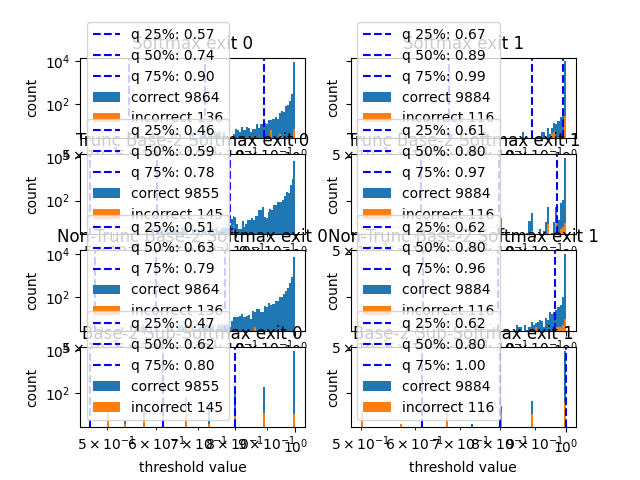

In [90]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats

sftmx = data['test_vals']['comps'][0]['raw_softmax']

true_vals = data['test_vals']['true_indices']

num_exits = data['test_vals']['num_exits']

num_compares = len(data['test_vals']['comps'])

# num_exits x num_samples x num_classes

sftmx = np.array(sftmx)

fig, axis = plt.subplots(nrows=num_compares, ncols=num_exits, sharey=True)
# print(axis)

for row, function in enumerate(data['test_vals']['comps']):
  
  sftmx = function['raw_softmax']
  name = function['name']
  
  for exit_num, softmax in enumerate(sftmx):
    
    ax = axis[row][exit_num]
    
    # discern between correctly classified values and not  
    correctness = np.argmax(softmax, -1) == true_vals

    # separate the maximum values for the correct and incorrect
    softmax = np.max(softmax, -1)
    correct_vals = softmax[correctness]
    wrong_vals = softmax[np.invert(correctness)]
    
    logbins = np.logspace(np.log10(0.5),np.log10(1),100)
    # logbins = np.linspace(0.5, 1, 200)
    
    quants = [0.25, 0.5, 0.75]
    quantiles = mstats.mquantiles(wrong_vals, prob=quants)
    for i, q in enumerate(quantiles):
      ax.axvline(q, 0, color='b', ls='--', label=f"q {quants[i]*100:.0f}%: {q:.02f}")
    
    ax.hist(correct_vals, bins=logbins, label=f'correct {correct_vals.shape[0]}')
    ax.hist(wrong_vals, bins=logbins, stacked=True, label=f'incorrect {wrong_vals.shape[0]}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('threshold value')
    ax.set_ylabel('count')
    ax.set_title(f"{name} exit {exit_num}")
    ax.legend()

# fig.set_size_inches(6 * num_exits, 4 * num_compares)
plt.show()